<a href="https://colab.research.google.com/github/kanstat/Machine_learning/blob/main/potato_leaf_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install kaggle
! pip install -q kaggle

In [2]:
#uploag kaggle json from local system
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"xskanstat","key":"8379b0f1e19c1adc7bf64356a177d4df"}'}

In [3]:
#create a kaggle directory
! mkdir ~/.kaggle

In [4]:
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [5]:
#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
#to list all the dataset in kaggle
! kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39           9929       1344  0.9375           
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                        2MB  2022-05-15 00:01:23           2037         72  1.0              
mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education    6KB  2022-04-16 04:46:28           6610        168  1.0              
muratkokludataset/acoustic-extinguisher-fire-

In [7]:
#just to connect google colab with kaggle to use any kaggle dataset
! kaggle datasets download -d abbasataiemontazer/potato-leaf

 36% 9.00M/25.2M [00:00<00:00, 67.6MB/s]
100% 25.2M/25.2M [00:00<00:00, 138MB/s] 


In [8]:
#unzip train data
!unzip potato-leaf.zip

Archive:  potato-leaf.zip
  inflating: Potato/Test/Potato___Early_blight/034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG  
  inflating: Potato/Test/Potato___Early_blight/042135e2-e126-4900-9212-d42d900b8125___RS_Early.B 8791.JPG  
  inflating: Potato/Test/Potato___Early_blight/0604174e-3018-4faa-9975-0be32d2c0789___RS_Early.B 7123.JPG  
  inflating: Potato/Test/Potato___Early_blight/07953ca1-8935-449f-b338-4357ed683b2d___RS_Early.B 6815.JPG  
  inflating: Potato/Test/Potato___Early_blight/08029ccc-387e-4be6-9389-04f7b82fdb2a___RS_Early.B 9130.JPG  
  inflating: Potato/Test/Potato___Early_blight/08194ca3-f0b2-4aaa-8df8-5ec5ddc6696a___RS_Early.B 8151.JPG  
  inflating: Potato/Test/Potato___Early_blight/08392b44-ecc6-4f38-8566-361b552cfe21___RS_Early.B 7393.JPG  
  inflating: Potato/Test/Potato___Early_blight/107827b3-faa5-457c-97fd-3e34d2657f6b___RS_Early.B 7162.JPG  
  inflating: Potato/Test/Potato___Early_blight/109730cd-03f3-4139-a464-5f9151483e8c___RS_Early.B 6738.JPG  
  

In [9]:
# import neccessary libararies
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [10]:
Image_size = 256
Batch_size = 15
Channels =3
EPOCHS = 20

In [11]:
#load dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/Potato/Train",
shuffle = True,
image_size = (Image_size,Image_size),
batch_size = Batch_size
)


Found 900 files belonging to 3 classes.


In [12]:
classname = dataset.class_names
classname

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [13]:
len(dataset)

60

(15, 256, 256, 3)
[0 1 0 0 0 0 1 2 1 2 0 2 0 0 0]
(15, 256, 256, 3)
[0 1 0 0 0 0 1 2 1 2 0 2 0 0 0]
(15, 256, 256, 3)
[0 1 0 0 0 0 1 2 1 2 0 2 0 0 0]
(15, 256, 256, 3)
[0 1 0 0 0 0 1 2 1 2 0 2 0 0 0]
(15, 256, 256, 3)
[0 1 0 0 0 0 1 2 1 2 0 2 0 0 0]
(15, 256, 256, 3)
[0 1 0 0 0 0 1 2 1 2 0 2 0 0 0]
(15, 256, 256, 3)
[0 1 0 0 0 0 1 2 1 2 0 2 0 0 0]
(15, 256, 256, 3)
[0 1 0 0 0 0 1 2 1 2 0 2 0 0 0]
(15, 256, 256, 3)
[0 1 0 0 0 0 1 2 1 2 0 2 0 0 0]
(15, 256, 256, 3)
[0 1 0 0 0 0 1 2 1 2 0 2 0 0 0]
(15, 256, 256, 3)
[0 1 0 0 0 0 1 2 1 2 0 2 0 0 0]
(15, 256, 256, 3)
[0 1 0 0 0 0 1 2 1 2 0 2 0 0 0]


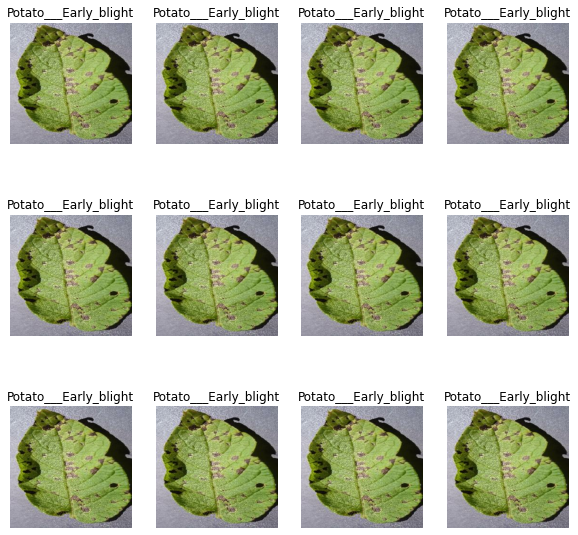

In [14]:
#explore dataset
#to remove messed area
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    #to print first image
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")
    #to give class name
    plt.title(classname[label_batch[0]])
    print(image_batch.shape)
    print(label_batch.numpy())


In [15]:
len(dataset)

60

In [16]:
#80% == training, 10%==>test,
#10%==>validation

In [17]:
training_size =0.8
len(dataset)*training_size


48.0

In [18]:
train_ds = dataset.take(48)
len(train_ds)

48

In [19]:
test_data = dataset.skip(48)
len(test_data)

12

In [20]:
val_size = 0.1
len(dataset)*val_size


6.0

In [21]:
val_ds =test_data.take(6)
len(val_ds)

6

In [22]:
test_ds= test_data.skip(6)
len(test_ds)

6

In [23]:
# a fuction to give train, test and validation size
def get_dataset_partition(dataset, train_split=0.8 , test_split=0.1 , val_split=0.1,shuffle =True,shuffle_size=10000):
  if shuffle:
    dataset = dataset.shuffle(shuffle_size,seed=12)
  dataset_size = len(dataset)
  train_size =int(dataset_size*train_split)
  val_size = int(dataset_size*val_split)
  train_ds =dataset.take(train_size)
  val_ds = dataset.skip(train_size).take(val_size)
  test_ds = dataset.skip(train_size).skip(val_size)


  return train_ds, test_ds, val_ds


In [24]:
train_ds, test_ds,val_ds = get_dataset_partition(dataset)

In [25]:
len(train_ds)

48

In [26]:
len(test_ds)

6

In [27]:
len(val_ds)

6

In [28]:
#cache==>read the image from the disk for the next iteration when you need the same image, it will keep the image in the memory
#prefetch--> if you are using gpu or cpu, if gpu is busy in training prefetch will load the next set of batch from your disk,
# that will improve the performance
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds= test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [29]:
#image preprocessing(scaling)
#we have rgb channels from 0-255 so we have to convert it b/w 0 and 1, devide it by 255
resize_and_rescale = tf.keras.Sequential([
                                        layers.experimental.preprocessing.Resizing(Image_size,Image_size),
                                        layers.experimental.preprocessing.Rescaling(1.0/255)
                                        ])


In [30]:
#data augumentation
data_aug = tf.keras.Sequential([
                     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                     layers.experimental.preprocessing.RandomRotation(0.2),
])

In [31]:
#building a model using cnn or model architecture
Input_shape =(Batch_size,Image_size,Image_size,Channels)
n_classes = 3
model = models.Sequential([
                           resize_and_rescale,
                           data_aug,
                           layers.Conv2D(32,(3,3),activation='relu',input_shape = Input_shape),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(64,(3,3),activation='relu'),
                           layers.MaxPooling2D((2,2)),
                            layers.Conv2D(64,(3,3),activation='relu'),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(64,(3,3),activation='relu'),
                           layers.MaxPooling2D((2,2)),
                          layers.Flatten(),
                           layers.Dense(64,activation='relu'),
                          layers.Dense(64,activation='softmax')

])
model.build(input_shape=Input_shape)

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (15, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (15, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (15, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (15, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (15, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (15, 62, 62, 64)         0         
 2D)                                                  

In [33]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics = 'accuracy'
              )

In [34]:
history = model.fit(
           train_ds,
           epochs=EPOCHS,
           batch_size= Batch_size,
           verbose = 1,
          validation_data = val_ds


)

Epoch 1/20
48/48 [==============================] - 20s 64ms/step - loss: 1.7579 - accuracy: 0.3889 - val_loss: 1.0238 - val_accuracy: 0.5222
Epoch 2/20
48/48 [==============================] - 2s 37ms/step - loss: 0.8101 - accuracy: 0.6236 - val_loss: 0.7144 - val_accuracy: 0.6889
Epoch 3/20
48/48 [==============================] - 2s 35ms/step - loss: 0.6141 - accuracy: 0.7111 - val_loss: 0.4178 - val_accuracy: 0.8111
Epoch 4/20
48/48 [==============================] - 2s 35ms/step - loss: 0.4950 - accuracy: 0.7792 - val_loss: 0.5067 - val_accuracy: 0.8222
Epoch 5/20
48/48 [==============================] - 2s 35ms/step - loss: 0.4243 - accuracy: 0.8264 - val_loss: 0.3571 - val_accuracy: 0.8222
Epoch 6/20
48/48 [==============================] - 2s 35ms/step - loss: 0.3518 - accuracy: 0.8583 - val_loss: 0.3873 - val_accuracy: 0.8333
Epoch 7/20
48/48 [==============================] - 2s 36ms/step - loss: 0.3260 - accuracy: 0.8486 - val_loss: 0.3811 - val_accuracy: 0.8778
Epoch 8/20
4

In [35]:
scores = model.evaluate(test_ds)

6/6 [==============================] - 1s 16ms/step - loss: 0.4684 - accuracy: 0.8778


In [36]:
scores

[0.46841904520988464, 0.8777777552604675]

In [37]:
history

In [38]:
history.params

{'epochs': 20, 'steps': 48, 'verbose': 1}

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

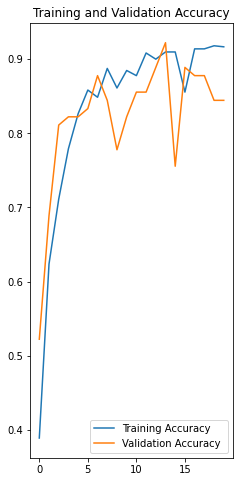

In [41]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy ")
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

In [44]:
np.argmax([9.99989629e-01, 1.03472948e-05, 6.74252624e-12, 2.07862707e-198])

0

first image to predict
actual label: Potato___healthy
prediction label: Potato___healthy


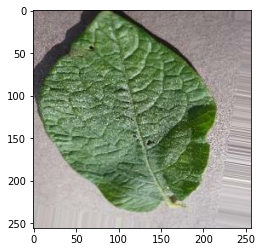

In [43]:
import numpy as np
for image_batch, label_batch in test_ds.take(1):
  first_image=(image_batch[0].numpy().astype('uint8'))
  first_label = label_batch[0].numpy()
  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:", classname[first_label])

  batch_prediction= model.predict(image_batch)
  print("prediction label:",classname[np.argmax(batch_prediction[0])])
